# Decision Trees and Random Forests - Kyphosis

<img src="images/kyphosis.jpg"/>

**Kyphosis** is a spinal disorder in which an excessive outward curve of the spine results in an abnormal rounding of the upper back. The condition is sometimes known as "roundback" or—in the case of a severe curve—as "hunchback." Kyphosis can occur at any age, but is common during adolescence.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

## Get the Data

In [3]:
df = pd.read_csv('data/kyphosis.csv')

df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

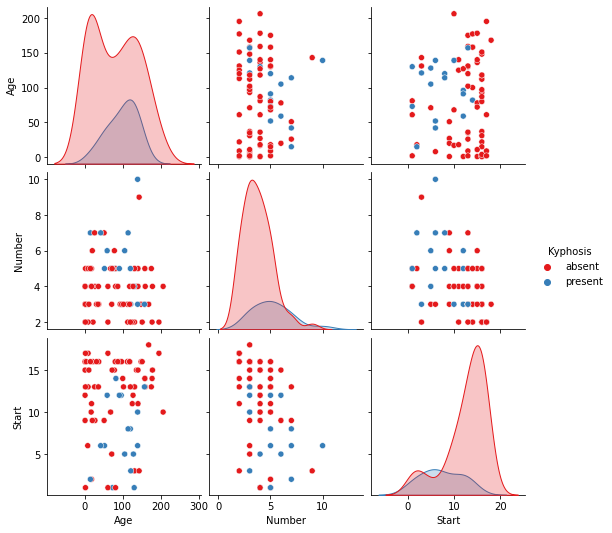

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(confusion_matrix(y_test,predictions))

[[18  4]
 [ 1  2]]


In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.95      0.82      0.88        22
     present       0.33      0.67      0.44         3

    accuracy                           0.80        25
   macro avg       0.64      0.74      0.66        25
weighted avg       0.87      0.80      0.83        25



## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [15]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

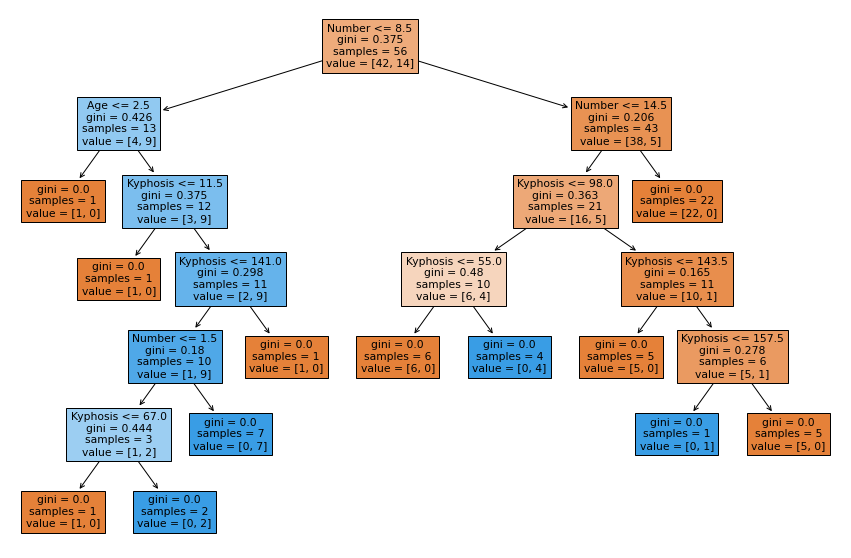

In [16]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15,10))
_ = plot_tree(dtree,feature_names=df.columns, filled=True)

# Alternative
#from sklearn import tree
#plt.figure(figsize=(16,8))
#tree.plot_tree(dtree)

## Random Forests

Now let's compare the decision tree model to a random forest.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[19  3]
 [ 0  3]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       1.00      0.86      0.93        22
     present       0.50      1.00      0.67         3

    accuracy                           0.88        25
   macro avg       0.75      0.93      0.80        25
weighted avg       0.94      0.88      0.90        25

